# :::::::::::::::::::::::::::::::::  🤩  WELCOME  🤩  :::::::::::::::::::::::::::::::::

#  <center>English Dictionary App</center>

This project uses the skills learnt from week 1 to week 6. The aim of this project is to create an English Dictionary app that returns definitions of English words. When the application is started, it displays a menu as follows:

>>Main Menu

>Add a new word

>Find the meaning

>Update a word

>Exit


Enter Choice:

If item 1 is selected, it should prompt for a word and then accept its meaning. This pair of word and its meaning should be stored in a file called ‘words.txt’. When item 2 is selected, it should prompt for a word, search that word in the file ‘words.txt’ and return the meaning if it is found. If the meaning is not found, it should display an appropriate message. Similarly, when choice 3 is entered, it should accept a word and update its meaning. In all the above three cases, the prompt should return to the main menu. The words and their meanings should be stored as a dictionary in words.txt, using the concept of serialization. If choice 4 is selected, a graceful exit should be performed.

>> already give you some words in <b>"words.txt"</b>

## words.txt
    cat : a small carnivorous mammal with soft fur, a short snout, and retractable claws.
    dog : a domesticated carnivorous mammal that typically has a long snout, an acute sense of smell, and a barking or howling voice.
    car : a road vehicle, typically with four wheels, powered by an internal combustion engine or an electric motor and designed for the transportation of people or goods.
    book : a written or printed work consisting of pages glued or sewn together along one side and bound in covers.
    happy : feeling or showing pleasure or contentment.
    sad : feeling or showing sorrow; unhappy.
    hot : having a high degree of heat or a high temperature.
    cold : of or at a low or relatively low temperature, especially when compared with the human body.
    big : of considerable size or extent.
    small : of a size that is less than normal or usual.

In [2]:
from tkinter import *
window = Tk()
window.title("Main Menu")
window.geometry("250x200")

def add_word():
    word = input("Enter the word: ")
    word = word.replace(" ", "")
    word = word.lower()
    
    #file.seek(0)
    with open("words.txt", "r+") as file:
        lines = file.readlines()
        for line in lines:
            if line.startswith(word+":"):
                
                print("Meaning:", line.split(":")[1].strip())
                print("Word already present!, If you want to change meaning then click on 'Update button'")
                return
        meaning = input("Enter the meaning: ")
        word.lower()
        file.write(word + ":" + meaning + "\n")
        print("Word added successfully!")
        
def find_word():
    word = input("Enter the word: ")
    word = word.replace(" ", "")
    word = word.lower()
    #file.seek(0)
    with open("words.txt", "r+") as file:
        lines = file.readlines()
        for line in lines:
            if line.startswith(word+":"):
                print("Meaning:", line.split(":")[1].strip())
                return
        else:
            print("Word not present!")
            

                
def update_word():
    word = input("Enter the word: ")
    word = word.replace(" ", "")
    word = word.lower()
    #meaning = input("Enter the meaning: ")
    with open("words.txt", "r+") as file:
        lines = file.readlines()
        file.seek(0)  # reset the file pointer to the beginning of the file
        for line in lines:
            if line.startswith(word+":"):
                print("Word already present!")
                print("Meaning:", line.split(":")[1].strip())
                update = input("Do you want to update the meaning? (y/n): ")
                
                if update.lower() == "y":
                    meaning = input("Enter the meaning: ")
                    line = word + ":" + meaning + "\n"
                    print("Word meaning updated!")
                else:
                    return
            file.write(line)
                    
                    
                    
b1 = Button(window,text= "Add a new word",width =15,command=add_word)
b1.grid(row=0,column=0,padx=65,pady=20)

b2 = Button(window,text= "Find the meaning",width =15,command=find_word)
b2.grid(row=1,column=0)

b3 = Button(window,text= "Update a word",width =15,command = update_word)
b3.grid(row=3,column=0,padx=10,pady=20)

b4 = Button(window,text= "Exit",command = window.destroy,width =15)
b4.grid(row=4,column=0)


window.mainloop()



Enter the word: cat
Meaning: a small carnivorous mammal with soft fur, a short snout, and retractable claws.


# <center>Library Book Management System</center>

>In this project, a Library Book Management System will be implemented with the front end GUI developed using Tkinter and the backend database implemented in SQLite. It is a single window tkinter GUI application which will implement CRUD( create, read, update, delete) operations on a ‘books’ database, in SQLite. The window will contain text widgets to accept / display book title, author, year of publication, ISBN (optional) and a large text area/ list box to display the records which match the search criteria.

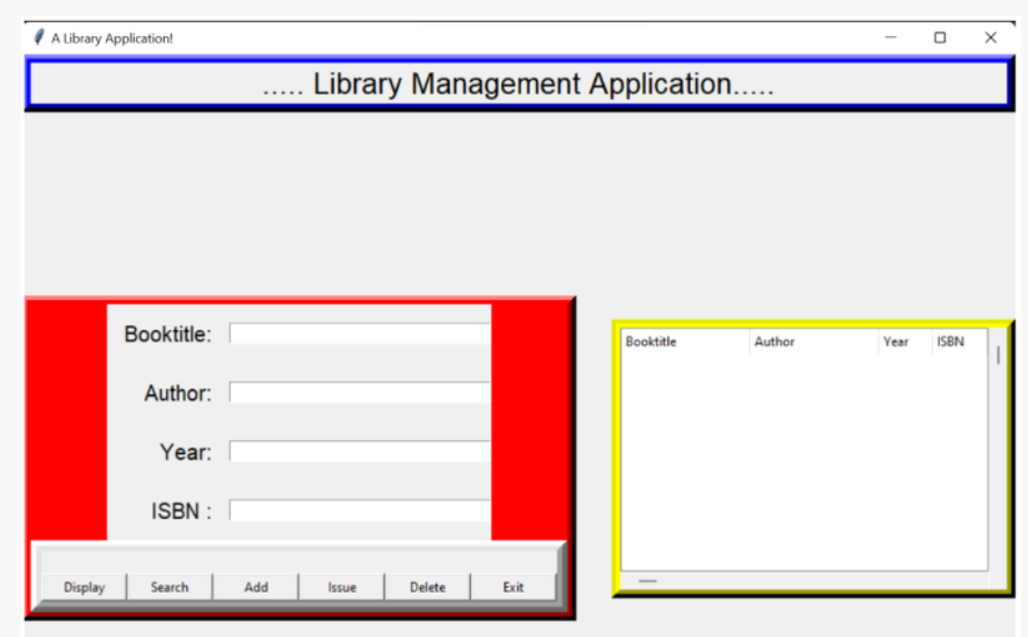

In [4]:
import sqlite3
from tkinter import *
from tkinter.ttk import Treeview
# Create the window
window = Tk()

# Set the window title
window.title("My Window")

# Set the window dimensions
window.geometry("900x500")

blue_frame = Frame(window, bg="blue", relief="solid")
blue_frame.pack(anchor=N,fill=X,pady=20,padx=10)
l1 = Label(blue_frame,text = ".....Library Management Application.....",bd=5,relief="raised",height=2,font = ("bold"))

l1.pack(anchor=N,fill=X,padx=5,pady=5)


# Create two frames
left_frame = Frame(window,bg = 'red',bd=5, width=450, height=300,relief="raised")
right_frame = Frame(window,bg= 'yellow',bd=5, width=300, height=270,relief="raised")

# Pack the frames into the window
left_frame.pack(side=LEFT,anchor=SW, padx=20,pady=10)
right_frame.pack(side=RIGHT,anchor=SE, padx=20,pady=30)

#gray_frame 1
gray_frame = Frame(left_frame, bg='#e6eff0', width=450, height=250,relief="raised")
gray_frame.pack(anchor=N,padx=0, pady=20)


#gray_frame 2
gray_frame2 = Frame(left_frame, bg='#e6eff0', width=450, height=100,relief="raised",bd=10)
gray_frame2.pack(padx=10, pady=0,ipady=10)

# Create a database connection
conn = sqlite3.connect('books.db')

# Create a cursor object
c = conn.cursor()

# Create the books table if it doesn't exist
c.execute('''CREATE TABLE IF NOT EXISTS books
             (title text, author text, year integer, isbn text)''')

# Function to add a book to the database
def add_book():
    title = title_entry.get()
    author = author_entry.get()
    year = year_entry.get()
    isbn = isbn_entry.get()
    c.execute("INSERT INTO books VALUES (?, ?, ?, ?)", (title, author, year, isbn))
    
    conn.commit()
    clear_entries()
    view_all_books()

# Function to update a book in the database
def update_book():
    selected_book = tree.focus()
    values = tree.item(selected_book, 'values')
    if not values:
        return
    title = title_entry.get()
    author = author_entry.get()
    year = year_entry.get()
    isbn = isbn_entry.get()
    c.execute("UPDATE books SET title=?, author=?, year=?, isbn=? WHERE title=? AND author=? AND year=? AND isbn=?",
              (title, author, year, isbn, values[0], values[1], values[2], values[3]))
    conn.commit()
    clear_entries()
    view_all_books()
# Function to delete a book from the database
def delete_book():
    selected_book = tree.focus()
    values = tree.item(selected_book, 'values')
    if not values:
        return
    c.execute("DELETE FROM books WHERE title=? AND author=? AND year=? AND isbn=?",
              (values[0], values[1], values[2], values[3]))
    conn.commit()
    clear_entries()
    view_all_books()
def clear_entries():
    title_entry.delete(0, END)
    author_entry.delete(0, END)
    year_entry.delete(0, END)
    isbn_entry.delete(0, END)
# Function to view all books in the database
def view_all_books():
    tree.delete(*tree.get_children())
    for row in c.execute("SELECT * FROM books"):
        tree.insert("", END, values=row)

# Function to search for a book in the database
def search_books():
    tree.delete(*tree.get_children())
    title = title_entry.get()
    author = author_entry.get()
    year = year_entry.get()
    isbn = isbn_entry.get()
    for row in c.execute("SELECT * FROM books WHERE title=? OR author=? OR year=? OR isbn=?",
                         (title, author, year, isbn)):
        tree.insert("", END, values=row)


    
def issue():
    # Create a new window for issuing a book
    issue_window = Toplevel(window)
    issue_window.title("Issue a Book")
    
    # Create labels and entry widgets for member name and book title
    member_label = Label(issue_window, text="Member Name:")
    member_label.grid(row=0, column=0, padx=5, pady=5, sticky=W)
    member_entry = Entry(issue_window, width=30)
    member_entry.grid(row=0, column=1, padx=5, pady=5)
    
    book_label = Label(issue_window, text="Book Title:")
    book_label.grid(row=1, column=0, padx=5, pady=5, sticky=W)
    book_entry = Entry(issue_window, width=30)
    book_entry.grid(row=1, column=1, padx=5, pady=5)
    
    # Create a button to issue the book
    issue_button = Button(issue_window, text="Issue Book", width=15, command=lambda: issue_book(member_entry.get(), book_entry.get()))
    issue_button.grid(row=2, column=1, padx=5, pady=5)
    issue_button1 = Button(issue_window, text="Issue list", width=15, command=view_all_issue_book)
    issue_button1.grid(row=2, column=0, padx=5, pady=5)

    

def issue_book(member_name, book_title):
    # Open a connection to the database
    conn = sqlite3.connect("books.db")
    c = conn.cursor()

    # Check if the book is available to be issued
    c.execute("SELECT * FROM books WHERE title=?", (book_title,))
    book = c.fetchone()

    if book is None:
        print("Error: Book not found.")
        conn.commit()
        conn.close()
    else:
        with open("issueBOOK",'a') as f:
            f.write(f"Book '{book_title}' issued to {member_name}\n")
                  
        # Create a database connection
        conn1 = sqlite3.connect('books_issue1.db')
        # Create a cursor object
        c1 = conn1.cursor()
        # Check if the book is available to be issued
        c1.execute('''CREATE TABLE IF NOT EXISTS books_issue
             (title text, member text)''')
        c1.execute("SELECT * FROM books_issue WHERE title=?", (book_title,))
        book = c1.fetchone()
#         if book is None:
#             print("Error: Book not found.")
#         else:
            # Update the database to reflect the book being issued
        c1.execute("UPDATE books_issue SET member=? WHERE title=?", (member_name, book_title))
#        
                    
        print(f"Book '{book_title}' issued to {member_name}.")
        conn1.commit()
             # Close the database connection
        conn1.close()
      

def view_all_issue_book():
    with open("issueBOOK",'r')as f:
        print("*"*10)
        print("The books Issued by:")
        print(f.read())
        print("*"*10)
        
#     a = []
#     conn1 = sqlite3.connect('books_issue1.db')
#         # Create a cursor object
#     c1 = conn1.cursor()
#     for row in c1.execute("SELECT * FROM books_issue"):
#         a.insert("", END, values=row)
#         print(a)
#     conn1.commit()
#     conn1.close()
    
    #ohhhh i didnt give allfatch method yaaaa fatch all ok yes sir thanx no sir 
    # Function to issue the book
    # Function to issue the book

#gray_fream 1 Label
g1_l1 = Label(gray_frame,text="Booktitle:")
g1_l1.grid(row=0,column=0,padx=10, pady=15)

g1_l2 = Label(gray_frame,text="Author:")
g1_l2.grid(row=1,column=0,padx=10, pady=15)

g1_l3 = Label(gray_frame,text="Year:")
g1_l3.grid(row=2,column=0,padx=10, pady=15)

g1_l4= Label(gray_frame,text="ISBN:")
g1_l4.grid(row=3,column=0,padx=10, pady=15)


#gray_fream 1 Entry
title_entry = Entry(gray_frame)
title_entry.grid(row=0,column=1)
author_entry = Entry(gray_frame)
author_entry.grid(row=1,column=1)
year_entry = Entry(gray_frame)
year_entry.grid(row=2,column=1)
isbn_entry = Entry(gray_frame)
isbn_entry.grid(row=3,column=1)

Button(gray_frame2, text="Display", width=10,command=view_all_books).grid(row=0, column=0,sticky=S)#pady=15)#ipady=10)
Button(gray_frame2, text="Search", width=10,command=search_books).grid(row=0, column=1, pady=(65,0), sticky='s')
Button(gray_frame2, text="Add ", width=10,command = add_book).grid(row=0, column=2,sticky=S)
Button(gray_frame2, text="Issue", width=10,command=issue).grid(row=0, column=3,sticky=S)
Button(gray_frame2, text="Delete", width=10,command=delete_book).grid(row=0, column=4,sticky=S)
Button(gray_frame2, text="Exit", width=10,command=window.destroy).grid(row=0, column=5,sticky=S)#command = gray_frame2.destroy)


#Right side code
gray_frame3 = Frame(right_frame, bg="white",bd=5, width=300, height=280,relief="raised")
gray_frame3.pack(anchor=NW,padx=0, ipady=15,ipadx=150)


tree = Treeview(gray_frame3,column=['BookTitle','Author',"Year",'ISBN'],show="headings")
tree.column('BookTitle', minwidth=0, width=80)
tree.column('Author', minwidth=0, width=50)
tree.column('Year', minwidth=0, width=20)
tree.column('ISBN', minwidth=0, width=30)
tree.heading('BookTitle',text='BookTitle')
tree.heading('Author',text="Author")
tree.heading('Year',text='Year')
tree.heading('ISBN',text="ISBN")
tree.pack(fill=BOTH, expand=1)

# Display the window
window.mainloop()


#  ::::::::::::::::::::::::::::::::: 🥳  THANK YOU 🥳  :::::::::::::::::::::::::::::::::